# CapsNets on Mnist dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

In [3]:
# Setting PATH to import utils functions from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from utils.load_data import load_mnist

## Loading dataset and normalising

In [4]:
(X_train, y_train), (X_test , y_test) = load_mnist(size=(1024, 512))

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

In [5]:
classes = np.arange(10)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

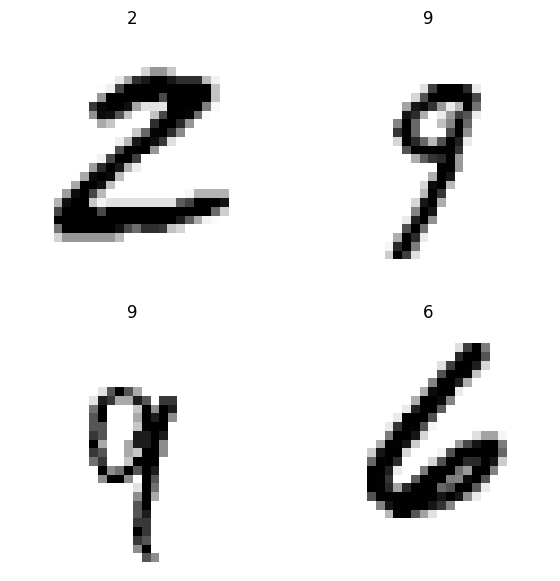

In [6]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [7]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [8]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

model = CapsNet(**params)
model._name = 'CapsNet-MNIST'
model.compile()
model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.34it/s, Training loss : 0.0002, Validation loss : 0.0010]


{'accuracy': ListWrapper([0.7451171875, 0.8984375, 0.947265625, 0.96484375, 0.9853515625, 0.9912109375, 0.9931640625, 0.99609375, 0.9970703125, 0.99609375]),
 'precision': ListWrapper([0.8077809197714308, 0.8994951521111295, 0.9475529224833016, 0.9653029131074996, 0.9855375517475149, 0.9913048431864111, 0.9932367715648157, 0.9961495602433046, 0.9971181832107843, 0.9961416207107843]),
 'recall': ListWrapper([0.7451171875, 0.8984375, 0.947265625, 0.96484375, 0.9853515625, 0.9912109375, 0.9931640625, 0.99609375, 0.9970703125, 0.99609375]),
 'f1': ListWrapper([0.7348972481165283, 0.8979824931752484, 0.9471639899379775, 0.9648005754392777, 0.9853657784115882, 0.991214523341957, 0.9931515513324372, 0.996092799919463, 0.9970747057998188, 0.996092663546004]),
 'loss': ListWrapper([0.8036619983613491, 0.3076929831877351, 0.18440928542986512, 0.11616824194788933, 0.07963018724694848, 0.056431267876178026, 0.044767826329916716, 0.03502587787806988, 0.027587273507378995, 0.02219291345681995]),
 'v

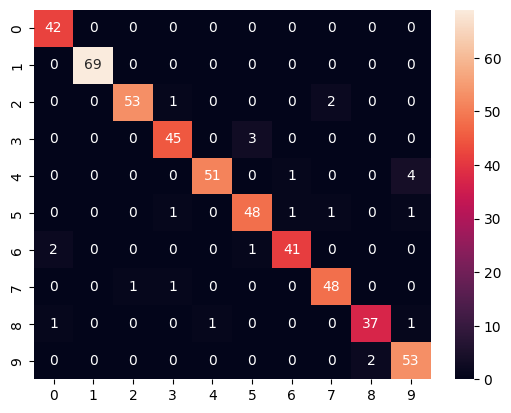

In [10]:
test = model.evaluate(X_test, y_test, np.arange(10))

In [16]:
test

,precision,recall,f1-score,support
0,0.933333,1.000000,0.965517,42.000000
1,1.000000,1.000000,1.000000,69.000000
2,0.981481,0.946429,0.963636,56.000000
3,0.937500,0.937500,0.937500,48.000000
4,0.980769,0.910714,0.944444,56.000000
5,0.923077,0.923077,0.923077,52.000000
6,0.953488,0.931818,0.942529,44.000000
7,0.941176,0.960000,0.950495,50.000000
8,0.948718,0.925000,0.936709,40.000000
9,0.898305,0.963636,0.929825,55.000000


## Loading and saving

Saving model under /saved_models/CapsNet-MNIST


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/CapsNet-MNIST/assets


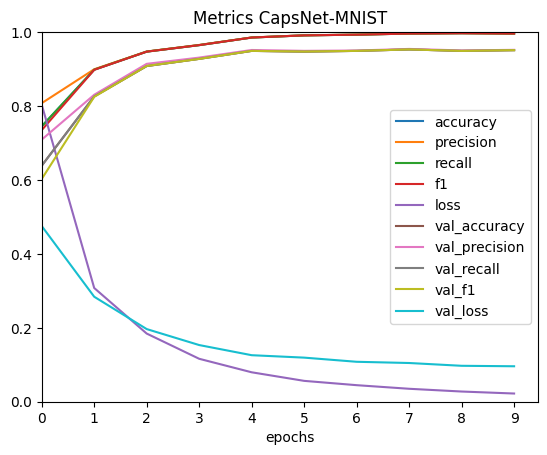

In [11]:
model.save()

In [12]:
loaded_model = tf.keras.models.load_model('../saved_models/CapsNet-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "CapsNet-MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense (Dense)               multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
